<a href="https://colab.research.google.com/github/knoppin1/DATA-690-WANG/blob/master/Individual_Project/COVID_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Sand Box

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

--2020-11-04 22:01:41--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3343663 (3.2M) [text/plain]
Saving to: ‘time_series_covid19_confirmed_US.csv.5’

time_series_covid19 100%[===================>]   3.19M  15.5MB/s    in 0.2s    

2020-11-04 22:01:42 (15.5 MB/s) - ‘time_series_covid19_confirmed_US.csv.5’ saved [3343663/3343663]



Read the saved CSV file into a pandas dataframe.

In [3]:
time_series_covid_df = pd.read_csv("time_series_covid19_confirmed_US.csv")
time_series_covid_df.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1757,1764,1773,1785,1787,1791,1798,1805,1818,1828,1831,1839,1852,1863,1882,1898,1905,1911,1924,1928,1949,1966,1983,1989,1999,2010,2021,2023,2030,2048,2059,2074,2082,2103,2126,2141,2159,2173,2186,2197
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5456,5477,5526,5588,5606,5640,5997,6024,6048,6073,6085,6116,6134,6141,6172,6190,6203,6220,6248,6270,6285,6333,6350,6369,6375,6405,6443,6475,6615,6637,6658,6694,6712,6743,6768,6888,6940,6966,6985,6995
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,873,882,885,886,886,896,898,902,921,921,921,923,927,927,939,942,942,944,951,950,965,968,977,981,981,988,996,997,1012,1031,1033,1033,1042,1045,1055,1056,1060,1061,1065,1074
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,652,654,656,657,658,664,672,675,678,686,687,691,703,708,719,726,736,738,744,744,761,771,775,785,789,791,801,811,825,828,840,843,850,856,861,866,873,878,883,890
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1608,1611,1617,1618,1621,1629,1634,1642,1655,1656,1662,1665,1673,1681,1689,1704,1713,1722,1742,1750,1768,1783,1807,1827,1838,1848,1873,1893,1911,1925,1932,1942,1972,1988,2009,2039,2074,2095,2108,2162


In [4]:
time_series_covid_df.shape

(3340, 298)

Check for Missing Data
- FIPS code is the critical field to evaluate since it is used to join with other data sets in the study.

In [5]:
# Find records with missing FIPS code
time_series_covid_df[time_series_covid_df.FIPS.isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20
1267,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,154,157,157,167,169,168,179,185,190,191,191,191,192,194,197,198,200,201,201,201,202,202,204,204,204,208,208,209,213,218,218,229,230,241,244,253,258,262,262,266
1304,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197
1336,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5593,5593,5593,5599,5603,5611,5616,5622,5623,5623,5623,5627,5631,5637,5650,5650,5650,5693,5790,5796,5803,5832,5846,5846,6248,6267,6293,6329,6459,6510,6510,6538,6562,6691,6883,6958,6984,6984,7016,7061
1591,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11034,11085,11147,11276,11276,11276,11276,12111,12253,12387,12418,12488,12536,12623,12743,13077,13077,13077,13077,12934,13101,13263,13499,13614,13733,13792,13869,13904,13989,14117,14229,14313,14435,14583,14583,14986,15245,15372,15593,15738
2954,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3271,3307,3351,3372,3398,3425,3449,3510,3553,3613,3679,3721,3751,3859,3911,3974,4038,4109,4142,4188,4301,4363,4436,4509,4578,4624,4659,4754,4867,4956,5025,5101,5149,5197,5336,5438,5529,5614,5652,5721
2959,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,637,641,647,661,671,681,697,707,727,752,764,766,794,809,824,855,880,890,908,943,977,996,1038,1058,1072,1077,1122,1150,1176,1203,1227,1253,1261,1293,1318,1358,1388,1435,1440,1443
2978,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,204,207,214,216,221,223,229,233,235,243,250,256,257,268,277,285,289,292,308,320,337,349,357,359,362,373,385,408,422,439,452,453,466,488,512,532,548,566,575,606
2979,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4164,4193,4210,4234,4255,4304,4354,4408,4478,4521,4563,4597,4653,4682,4747,4822,4873,4925,4990,5023,5113,5160,5252,5325,5376,5423,5504,5571,5705,5792,5852,5971,6055,6153,6273,6380,6474,6568,6632,6741
2982,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,235,236,237,237,238,240,243,245,248,252,255,258,265,273,275,282,287,289,295,300,302,306,309,314,318,333,357,372,384,399,412,420,441,453,470,502,525,541,551,597
2990,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",0,0,0,0,0,0,0,0,0,0,

Remove records without a FIPS code

In [6]:
time_series_covid_df = time_series_covid_df[time_series_covid_df.FIPS.notna()]
time_series_covid_df.shape

(3330, 298)

Use `melt` to convert the dataframe from wide format to long format

In [7]:
long_time_series_covid_df = time_series_covid_df.melt(
    id_vars=time_series_covid_df.columns[:11],
    value_vars=time_series_covid_df.columns[11:],
    var_name="Date",
    value_name="Confirmed"
)
long_time_series_covid_df.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0


In [8]:
long_time_series_covid_df.describe(include='all')

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
count,9.557100e+05,955710,955710,955710.000000,955710.000000,953988,955710,955710,955710.000000,955710.000000,955710,955710,955710.000000
unique,NaN,6,6,NaN,NaN,1968,58,1,NaN,NaN,3330,287,NaN
top,NaN,US,USA,NaN,NaN,Unassigned,Texas,US,NaN,NaN,"Grady, Georgia, US",2/10/20,NaN
freq,NaN,931602,931602,NaN,NaN,14924,73472,955710,NaN,NaN,287,3330,NaN
mean,8.342766e+07,NaN,NaN,834.475075,33061.684685,NaN,NaN,NaN,36.721454,-88.617244,NaN,NaN,923.899194
std,4.321032e+06,NaN,NaN,36.546113,18636.151691,NaN,NaN,NaN,9.028842,21.615526,NaN,NaN,5468.242512
min,1.600000e+01,NaN,NaN,16.000000,60.000000,NaN,NaN,NaN,-14.271000,-174.159600,NaN,NaN,0.000000
25%,8.401810e+07,NaN,NaN,840.000000,19079.000000,NaN,NaN,NaN,33.892368,-97.782655,NaN,NaN,0.000000
50%,8.402920e+07,NaN,NaN,840.000000,31014.000000,NaN,NaN,NaN,37.995839,-89.456721,NaN,NaN,36.000000
75%,8.404610e+07,NaN,NaN,840.000000,47131.000000,NaN,NaN,NaN,41.589656,-82.312372,NaN,NaN,316.000000


In [9]:
long_time_series_covid_df[long_time_series_covid_df['Admin2']=='Unassigned']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
64,84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,"Unassigned, Alabama, US",1/22/20,0
95,84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,"Unassigned, Alaska, US",1/22/20,0
115,84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,"Unassigned, Arizona, US",1/22/20,0
188,84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,"Unassigned, Arkansas, US",1/22/20,0
251,84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,"Unassigned, California, US",1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955502,84090051,US,USA,840,90051.0,Unassigned,Virginia,US,0.0,0.0,"Unassigned, Virginia, US",11/3/20,0
955548,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0,0.0,"Unassigned, Washington, US",11/3/20,373
955603,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0,0.0,"Unassigned, West Virginia, US",11/3/20,0
955674,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0,0.0,"Unassigned, Wisconsin, US",11/3/20,0


In [10]:
# Remove 'Unassigned' counties (i.e., Admin2 column)
long_time_series_covid_df = long_time_series_covid_df[long_time_series_covid_df['Admin2']!='Unassigned']
long_time_series_covid_df[long_time_series_covid_df['Admin2']=='Unassigned']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed


In [11]:
# Remove irrelevant columns
irrelevant_columns = ['UID', 'iso2','iso3','code3','Admin2','Province_State','Country_Region','Lat','Long_']
covid_ts_df = long_time_series_covid_df.drop(irrelevant_columns, axis=1)
covid_ts_df.head(3)

,FIPS,Combined_Key,Date,Confirmed
0,1001.0,"Autauga, Alabama, US",1/22/20,0
1,1003.0,"Baldwin, Alabama, US",1/22/20,0
2,1005.0,"Barbour, Alabama, US",1/22/20,0


In [12]:
# Rename columns
covid_ts_df.rename(columns = {'Combined_Key':'County'}, inplace = True)
covid_ts_df.sample(5)

,FIPS,County,Date,Confirmed
355334,42059.0,"Greene, Pennsylvania, US",5/7/20,27
701029,31035.0,"Clay, Nebraska, US",8/19/20,51
268070,30033.0,"Garfield, Montana, US",4/11/20,0
75942,47169.0,"Trousdale, Tennessee, US",2/13/20,0
545331,46027.0,"Clay, South Dakota, US",7/3/20,87


In [13]:
# Convert the FIPS code to an integer
covid_ts_df = covid_ts_df.assign(FIPS=lambda x: x['FIPS'].astype(int))
covid_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940786 entries, 0 to 955709
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   FIPS       940786 non-null  int64 
 1   County     940786 non-null  object
 2   Date       940786 non-null  object
 3   Confirmed  940786 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 35.9+ MB


In [14]:
covid_ts_df.sample(5)

,FIPS,County,Date,Confirmed
448881,47129,"Morgan, Tennessee, US",6/4/20,17
111252,26163,"Wayne, Michigan, US",2/24/20,0
492317,48227,"Howard, Texas, US",6/17/20,24
909509,13021,"Bibb, Georgia, US",10/21/20,6499
25102,31159,"Seward, Nebraska, US",1/29/20,0


In [15]:
def scatter_plot(x_list, y_list, x_label, y_label, suptitle, title):

    assert len(x_list) == len(y_list) # verify lists are of eaual length

    plt.figure(figsize=(14, 8))  # in inches   
    plt.xlabel('\n'+ x_label, fontsize=16)
    plt.ylabel(y_label + '\n', fontsize=16)
    plt.suptitle(suptitle, fontsize=20, va='bottom')
    plt.title(title  + '\n', fontsize=18, va='center')
    plt.ticklabel_format(style='plain')

    plt.scatter(x_list, y_list, alpha=1., c="blue", edgecolors='none')

    plt.show()

In [16]:
hc = covid_ts_df[covid_ts_df['County']=='Howard, Maryland, US']
hc

,FIPS,County,Date,Confirmed
1250,24027,"Howard, Maryland, US",1/22/20,0
4580,24027,"Howard, Maryland, US",1/23/20,0
7910,24027,"Howard, Maryland, US",1/24/20,0
11240,24027,"Howard, Maryland, US",1/25/20,0
14570,24027,"Howard, Maryland, US",1/26/20,0
...,...,...,...,...
940310,24027,"Howard, Maryland, US",10/30/20,5930
943640,24027,"Howard, Maryland, US",10/31/20,5959
946970,24027,"Howard, Maryland, US",11/1/20,5988
950300,24027,"Howard, Maryland, US",11/2/20,6019


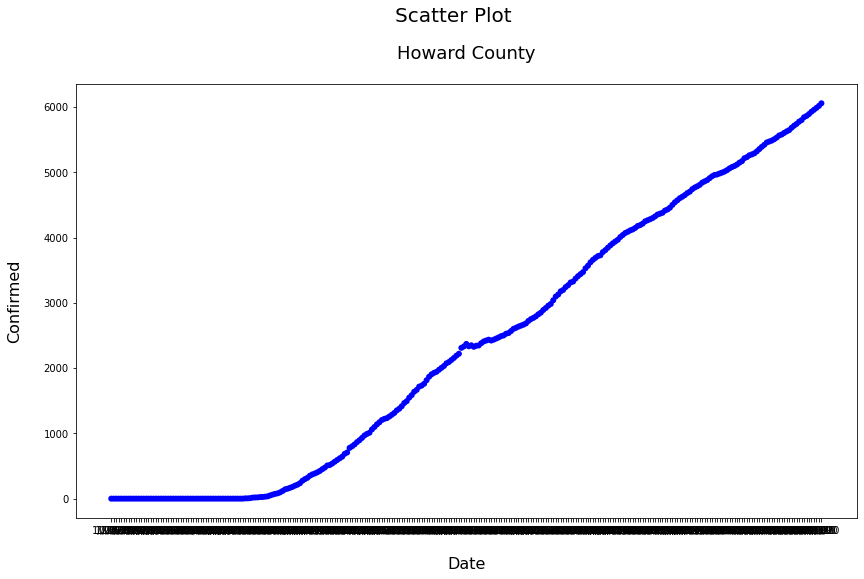

In [17]:
scatter_plot(hc['Date'],hc['Confirmed'],'Date','Confirmed','Scatter Plot','Howard County')

In [18]:
hc.tail(10)

,FIPS,County,Date,Confirmed
923660,24027,"Howard, Maryland, US",10/25/20,5777
926990,24027,"Howard, Maryland, US",10/26/20,5801
930320,24027,"Howard, Maryland, US",10/27/20,5845
933650,24027,"Howard, Maryland, US",10/28/20,5865
936980,24027,"Howard, Maryland, US",10/29/20,5894
940310,24027,"Howard, Maryland, US",10/30/20,5930
943640,24027,"Howard, Maryland, US",10/31/20,5959
946970,24027,"Howard, Maryland, US",11/1/20,5988
950300,24027,"Howard, Maryland, US",11/2/20,6019
953630,24027,"Howard, Maryland, US",11/3/20,6059


Get a list of the last day for each month in the year.

Ref: https://stackoverflow.com/questions/42950/how-to-get-the-last-day-of-the-month

In [19]:
from calendar import monthrange

YEAR = 2020
MILLENIUM = 2000
last_day_of_month = []
for month in range(1, 13):
    last_day_of_month.append(str(month) + '/' + str(monthrange(YEAR, month)[1]) + '/' + str(YEAR-MILLENIUM))
last_day_of_month

['1/31/20',
 '2/29/20',
 '3/31/20',
 '4/30/20',
 '5/31/20',
 '6/30/20',
 '7/31/20',
 '8/31/20',
 '9/30/20',
 '10/31/20',
 '11/30/20',
 '12/31/20']

In [20]:
hc[hc['Date']==last_day_of_month[1]]

,FIPS,County,Date,Confirmed
127790,24027,"Howard, Maryland, US",2/29/20,0


In [21]:
hc['Date'] = pd.to_datetime(hc['Date'], format='%m/%d/%y')
hc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 1250 to 953630
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FIPS       287 non-null    int64         
 1   County     287 non-null    object        
 2   Date       287 non-null    datetime64[ns]
 3   Confirmed  287 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
hc = hc[hc['Date'].isin(last_day_of_month)]
hc = hc.sort_values(by='Date', ascending=False)
hc

,FIPS,County,Date,Confirmed
943640,24027,"Howard, Maryland, US",2020-10-31,5959
840410,24027,"Howard, Maryland, US",2020-09-30,5120
740510,24027,"Howard, Maryland, US",2020-08-31,4381
637280,24027,"Howard, Maryland, US",2020-07-31,3530
534050,24027,"Howard, Maryland, US",2020-06-30,2538
434150,24027,"Howard, Maryland, US",2020-05-31,1928
330920,24027,"Howard, Maryland, US",2020-04-30,867
231020,24027,"Howard, Maryland, US",2020-03-31,117
127790,24027,"Howard, Maryland, US",2020-02-29,0
31220,24027,"Howard, Maryland, US",2020-01-31,0


Determine the newly confirmed bucket of cases for each month

Ref: https://stackoverflow.com/questions/23142967/adding-a-column-thats-result-of-difference-in-consecutive-rows-in-pandas

In [23]:
hc['Month'] = pd.DatetimeIndex(hc['Date']).month
hc['Newly_Confirmed'] = hc['Confirmed'] - hc['Confirmed'].shift(-1)
hc

,FIPS,County,Date,Confirmed,Month,Newly_Confirmed
943640,24027,"Howard, Maryland, US",2020-10-31,5959,10,839.0
840410,24027,"Howard, Maryland, US",2020-09-30,5120,9,739.0
740510,24027,"Howard, Maryland, US",2020-08-31,4381,8,851.0
637280,24027,"Howard, Maryland, US",2020-07-31,3530,7,992.0
534050,24027,"Howard, Maryland, US",2020-06-30,2538,6,610.0
434150,24027,"Howard, Maryland, US",2020-05-31,1928,5,1061.0
330920,24027,"Howard, Maryland, US",2020-04-30,867,4,750.0
231020,24027,"Howard, Maryland, US",2020-03-31,117,3,117.0
127790,24027,"Howard, Maryland, US",2020-02-29,0,2,0.0
31220,24027,"Howard, Maryland, US",2020-01-31,0,1,NaN


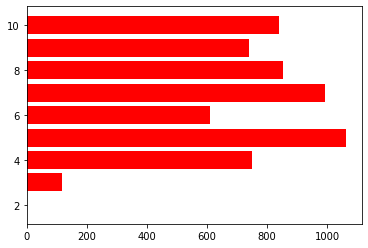

In [24]:
plt.barh(hc['Month'], hc['Newly_Confirmed'], color='red')
plt.show()

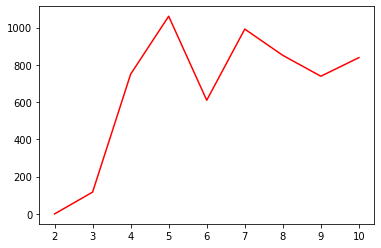

In [25]:
plt.plot(hc['Month'], hc['Newly_Confirmed'], color='red')
plt.show()

---
### Convert Date column from string to datetime format

In [26]:
covid_ts_df['Date'] = pd.to_datetime(covid_ts_df['Date'], format='%m/%d/%y')

In [27]:
covid_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940786 entries, 0 to 955709
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   FIPS       940786 non-null  int64         
 1   County     940786 non-null  object        
 2   Date       940786 non-null  datetime64[ns]
 3   Confirmed  940786 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 35.9+ MB


### Filter time series dataframe rows to only last day of each month

In [28]:
covid_by_month_df = covid_ts_df[covid_ts_df['Date'].isin(last_day_of_month)]
covid_by_month_df = covid_by_month_df.sort_values(by=['County','Date'], ascending=[True,False])
covid_by_month_df

,FIPS,County,Date,Confirmed
944871,45001,"Abbeville, South Carolina, US",2020-10-31,801
841641,45001,"Abbeville, South Carolina, US",2020-09-30,591
741741,45001,"Abbeville, South Carolina, US",2020-08-31,418
638511,45001,"Abbeville, South Carolina, US",2020-07-31,282
535281,45001,"Abbeville, South Carolina, US",2020-06-30,113
...,...,...,...,...
435496,46137,"Ziebach, South Dakota, US",2020-05-31,1
332266,46137,"Ziebach, South Dakota, US",2020-04-30,0
232366,46137,"Ziebach, South Dakota, US",2020-03-31,0
129136,46137,"Ziebach, South Dakota, US",2020-02-29,0


Add a `Month` column to the covid dataframe

In [29]:
covid_by_month_df['Month'] = pd.DatetimeIndex(covid_by_month_df['Date']).month
covid_by_month_df.head(3)

,FIPS,County,Date,Confirmed,Month
944871,45001,"Abbeville, South Carolina, US",2020-10-31,801,10
841641,45001,"Abbeville, South Carolina, US",2020-09-30,591,9
741741,45001,"Abbeville, South Carolina, US",2020-08-31,418,8


Determine the `New Cases` bucket of cases for each month

Ref: https://stackoverflow.com/questions/23142967/adding-a-column-thats-result-of-difference-in-consecutive-rows-in-pandas

In [30]:
covid_by_month_df['New Cases'] = 0
covid_by_month_df.head(3)

,FIPS,County,Date,Confirmed,Month,New Cases
944871,45001,"Abbeville, South Carolina, US",2020-10-31,801,10,0
841641,45001,"Abbeville, South Carolina, US",2020-09-30,591,9,0
741741,45001,"Abbeville, South Carolina, US",2020-08-31,418,8,0


In [31]:
covid_by_month_df['New Cases'] = covid_by_month_df['Confirmed'] - covid_by_month_df['Confirmed'].shift(-1)

Re-sort the dataframe to order by months in ascending order

In [32]:
covid_by_month_df = covid_by_month_df.sort_values(by=['County','Date'], ascending=[True,True])
covid_by_month_df

,FIPS,County,Date,Confirmed,Month,New Cases
32451,45001,"Abbeville, South Carolina, US",2020-01-31,0,1,-3169.0
129021,45001,"Abbeville, South Carolina, US",2020-02-29,0,2,0.0
232251,45001,"Abbeville, South Carolina, US",2020-03-31,4,3,4.0
332151,45001,"Abbeville, South Carolina, US",2020-04-30,31,4,27.0
435381,45001,"Abbeville, South Carolina, US",2020-05-31,42,5,11.0
...,...,...,...,...,...,...
535396,46137,"Ziebach, South Dakota, US",2020-06-30,2,6,1.0
638626,46137,"Ziebach, South Dakota, US",2020-07-31,8,7,6.0
741856,46137,"Ziebach, South Dakota, US",2020-08-31,48,8,40.0
841756,46137,"Ziebach, South Dakota, US",2020-09-30,63,9,15.0


Set `New Cases` to zero when negative, which indicates a transition to a new county.

Ref: https://kanoki.org/2019/07/17/pandas-how-to-replace-values-based-on-conditions/

In [33]:
covid_by_month_df['New Cases'].mask(covid_by_month_df['New Cases'] < 0, 0, inplace=True)
covid_by_month_df.head(15)

,FIPS,County,Date,Confirmed,Month,New Cases
32451,45001,"Abbeville, South Carolina, US",2020-01-31,0,1,0.0
129021,45001,"Abbeville, South Carolina, US",2020-02-29,0,2,0.0
232251,45001,"Abbeville, South Carolina, US",2020-03-31,4,3,4.0
332151,45001,"Abbeville, South Carolina, US",2020-04-30,31,4,27.0
435381,45001,"Abbeville, South Carolina, US",2020-05-31,42,5,11.0
535281,45001,"Abbeville, South Carolina, US",2020-06-30,113,6,71.0
638511,45001,"Abbeville, South Carolina, US",2020-07-31,282,7,169.0
741741,45001,"Abbeville, South Carolina, US",2020-08-31,418,8,136.0
841641,45001,"Abbeville, South Carolina, US",2020-09-30,591,9,173.0
944871,45001,"Abbeville, South Carolina, US",2020-10-31,801,10,210.0


In [34]:
top5 = covid_by_month_df.groupby(by='County')['Confirmed'].max().to_frame().reset_index().sort_values(by='Confirmed',ascending=False).head(5)
top5 

,County,Confirmed
1762,"Los Angeles, California, US",307618
653,"Cook, Illinois, US",189660
1964,"Miami-Dade, Florida, US",185891
1247,"Harris, Texas, US",161613
1836,"Maricopa, Arizona, US",158761


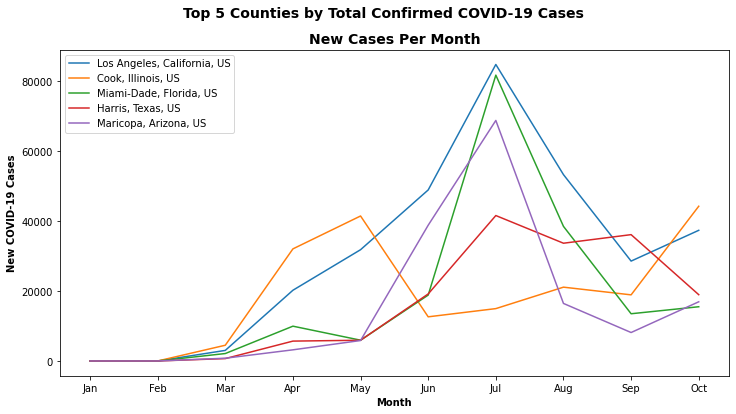

In [35]:
import datetime
plt.figure(figsize=(12, 6))
for county in top5['County']:
    months = covid_by_month_df[covid_by_month_df['County'] == county]['Month']
    abbrev_months = [datetime.date(2020, month_num, 1).strftime('%b') for month_num in months]
    new_cases = covid_by_month_df[covid_by_month_df['County'] == county]['New Cases']
    plt.plot(abbrev_months, new_cases, label = county)
plt.legend(loc='upper left')
plt.title("New Cases Per Month", fontsize=14, fontweight='bold')
plt.suptitle("Top 5 Counties by Total Confirmed COVID-19 Cases", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("New COVID-19 Cases", fontweight='bold')
plt.show()